# Principal Component Analysis

An unsupervised learning algorithm

## PCA Review

PCA is a transformation of data and attempts to find out what features explain the most variance in the data. 

<img src='PCA.png' />

## Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## Data



In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
print(cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [6]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
#(['DESCR', 'data', 'feature_names', 'target_names', 'target'])

In [31]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [53]:
np.unique(cancer['target'])

array([0, 1])

In [54]:
np.bincount(cancer['target'])

array([212, 357])

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## scale data so that each feature has a single unit variance.

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
scaled_data = scaler.transform(df)

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA()

In [16]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Now we can transform this data to principal components.

In [17]:
x_pca = pca.transform(scaled_data)

In [30]:
scaled_data.shape

(569, 30)

In [19]:
x_pca.shape

(569, 30)

In [21]:
var = pca.explained_variance_ratio_

In [22]:
var

array([  4.42720256e-01,   1.89711820e-01,   9.39316326e-02,
         6.60213492e-02,   5.49576849e-02,   4.02452204e-02,
         2.25073371e-02,   1.58872380e-02,   1.38964937e-02,
         1.16897819e-02,   9.79718988e-03,   8.70537901e-03,
         8.04524987e-03,   5.23365745e-03,   3.13783217e-03,
         2.66209337e-03,   1.97996793e-03,   1.75395945e-03,
         1.64925306e-03,   1.03864675e-03,   9.99096464e-04,
         9.14646751e-04,   8.11361259e-04,   6.01833567e-04,
         5.16042379e-04,   2.72587995e-04,   2.30015463e-04,
         5.29779290e-05,   2.49601032e-05,   4.43482743e-06])

In [23]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [24]:
var1

array([ 44.27,  63.24,  72.63,  79.23,  84.73,  88.75,  91.  ,  92.59,
        93.98,  95.15,  96.13,  97.  ,  97.8 ,  98.32,  98.63,  98.9 ,
        99.1 ,  99.28,  99.44,  99.54,  99.64,  99.73,  99.81,  99.87,
        99.92,  99.95,  99.97,  99.98,  99.98,  99.98])

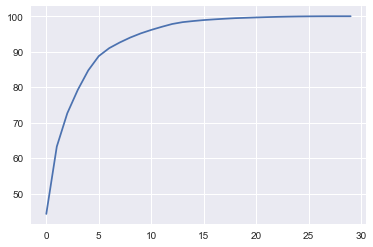

In [26]:
plt.plot(var1)

## Lets take 1st 5 components as they explain 90% of variance

In [29]:
clf = PCA(n_components=5)
pca_5 = clf.fit_transform(scaled_data)
pca_5.shape

(569, 5)

## Plot components

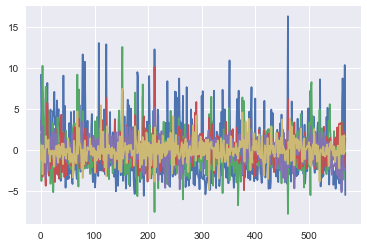

In [33]:
plt.plot(pca_5)

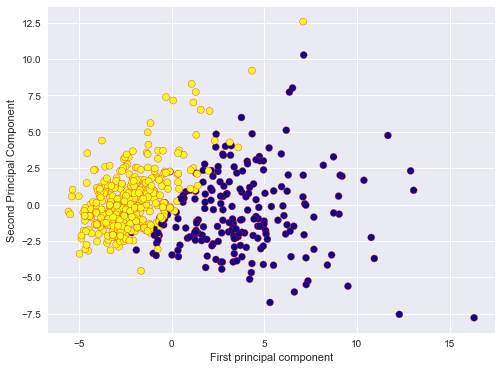

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(pca_5[:,0],pca_5[:,1],c=cancer['target'],cmap='plasma', edgecolors='r')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

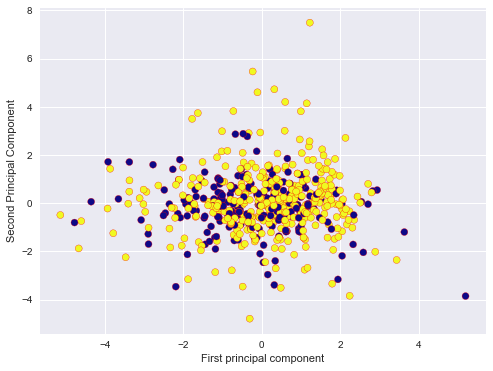

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(pca_5[:,3],pca_5[:,4],c=cancer['target'],cmap='plasma',edgecolors='r')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Clearly by using 1st two components we can easily separate the two classes.

## Interpreting the components 

The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

In [55]:
pca.components_

array([[  2.18902444e-01,   1.03724578e-01,   2.27537293e-01,
          2.20994985e-01,   1.42589694e-01,   2.39285354e-01,
          2.58400481e-01,   2.60853758e-01,   1.38166959e-01,
          6.43633464e-02,   2.05978776e-01,   1.74280281e-02,
          2.11325916e-01,   2.02869635e-01,   1.45314521e-02,
          1.70393451e-01,   1.53589790e-01,   1.83417397e-01,
          4.24984216e-02,   1.02568322e-01,   2.27996634e-01,
          1.04469325e-01,   2.36639681e-01,   2.24870533e-01,
          1.27952561e-01,   2.10095880e-01,   2.28767533e-01,
          2.50885971e-01,   1.22904556e-01,   1.31783943e-01],
       [ -2.33857132e-01,  -5.97060883e-02,  -2.15181361e-01,
         -2.31076711e-01,   1.86113023e-01,   1.51891610e-01,
          6.01653628e-02,  -3.47675005e-02,   1.90348770e-01,
          3.66575471e-01,  -1.05552152e-01,   8.99796818e-02,
         -8.94572342e-02,  -1.52292628e-01,   2.04430453e-01,
          2.32715896e-01,   1.97207283e-01,   1.30321560e-01,
       

## In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:

In [61]:
df_comp = pd.DataFrame(clf.components_,columns=cancer['feature_names'])

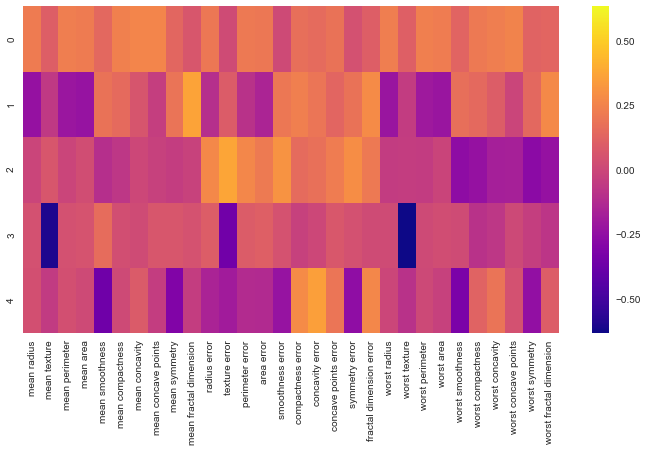

In [62]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.

## Conclusion

Use PCA to reduce dimensionality with high dimensional data!